# Test. Simple time series is arithmetic sequence. Predict next element of TS by LSTM. 

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import preprocessing

In [2]:
series = np.array([np.arange(0,5,0.1), np.arange(0,50,1)]).T
series

array([[ 0. ,  0. ],
       [ 0.1,  1. ],
       [ 0.2,  2. ],
       [ 0.3,  3. ],
       [ 0.4,  4. ],
       [ 0.5,  5. ],
       [ 0.6,  6. ],
       [ 0.7,  7. ],
       [ 0.8,  8. ],
       [ 0.9,  9. ],
       [ 1. , 10. ],
       [ 1.1, 11. ],
       [ 1.2, 12. ],
       [ 1.3, 13. ],
       [ 1.4, 14. ],
       [ 1.5, 15. ],
       [ 1.6, 16. ],
       [ 1.7, 17. ],
       [ 1.8, 18. ],
       [ 1.9, 19. ],
       [ 2. , 20. ],
       [ 2.1, 21. ],
       [ 2.2, 22. ],
       [ 2.3, 23. ],
       [ 2.4, 24. ],
       [ 2.5, 25. ],
       [ 2.6, 26. ],
       [ 2.7, 27. ],
       [ 2.8, 28. ],
       [ 2.9, 29. ],
       [ 3. , 30. ],
       [ 3.1, 31. ],
       [ 3.2, 32. ],
       [ 3.3, 33. ],
       [ 3.4, 34. ],
       [ 3.5, 35. ],
       [ 3.6, 36. ],
       [ 3.7, 37. ],
       [ 3.8, 38. ],
       [ 3.9, 39. ],
       [ 4. , 40. ],
       [ 4.1, 41. ],
       [ 4.2, 42. ],
       [ 4.3, 43. ],
       [ 4.4, 44. ],
       [ 4.5, 45. ],
       [ 4.6, 46. ],
       [ 4.7,

In [3]:
train = series[:40]
valid = series[40:]

# Create features. Each i-column is i-lag, last column is label.

Let's code step by step for understanding and then combine the commands in **a** function.

In [ ]:
n_lag = 5
batch_size = 20

In [ ]:
# Code for univariate time series:
# features = tf.data.Dataset.from_tensor_slices(tf.expand_dims(train, axis = -1))
# Code for multivariate time series:
features = tf.data.Dataset.from_tensor_slices(train)
list(features.as_numpy_iterator())

[array([0., 0.]),
 array([0.1, 1. ]),
 array([0.2, 2. ]),
 array([0.3, 3. ]),
 array([0.4, 4. ]),
 array([0.5, 5. ]),
 array([0.6, 6. ]),
 array([0.7, 7. ]),
 array([0.8, 8. ]),
 array([0.9, 9. ]),
 array([ 1., 10.]),
 array([ 1.1, 11. ]),
 array([ 1.2, 12. ]),
 array([ 1.3, 13. ]),
 array([ 1.4, 14. ]),
 array([ 1.5, 15. ]),
 array([ 1.6, 16. ]),
 array([ 1.7, 17. ]),
 array([ 1.8, 18. ]),
 array([ 1.9, 19. ]),
 array([ 2., 20.]),
 array([ 2.1, 21. ]),
 array([ 2.2, 22. ]),
 array([ 2.3, 23. ]),
 array([ 2.4, 24. ]),
 array([ 2.5, 25. ]),
 array([ 2.6, 26. ]),
 array([ 2.7, 27. ]),
 array([ 2.8, 28. ]),
 array([ 2.9, 29. ]),
 array([ 3., 30.]),
 array([ 3.1, 31. ]),
 array([ 3.2, 32. ]),
 array([ 3.3, 33. ]),
 array([ 3.4, 34. ]),
 array([ 3.5, 35. ]),
 array([ 3.6, 36. ]),
 array([ 3.7, 37. ]),
 array([ 3.8, 38. ]),
 array([ 3.9, 39. ])]

In [ ]:
features = features.window(n_lag+1, shift = 1, drop_remainder = True)
for row in features:
  print(list(row.as_numpy_iterator()))

[array([0., 0.]), array([0.1, 1. ]), array([0.2, 2. ]), array([0.3, 3. ]), array([0.4, 4. ]), array([0.5, 5. ])]
[array([0.1, 1. ]), array([0.2, 2. ]), array([0.3, 3. ]), array([0.4, 4. ]), array([0.5, 5. ]), array([0.6, 6. ])]
[array([0.2, 2. ]), array([0.3, 3. ]), array([0.4, 4. ]), array([0.5, 5. ]), array([0.6, 6. ]), array([0.7, 7. ])]
[array([0.3, 3. ]), array([0.4, 4. ]), array([0.5, 5. ]), array([0.6, 6. ]), array([0.7, 7. ]), array([0.8, 8. ])]
[array([0.4, 4. ]), array([0.5, 5. ]), array([0.6, 6. ]), array([0.7, 7. ]), array([0.8, 8. ]), array([0.9, 9. ])]
[array([0.5, 5. ]), array([0.6, 6. ]), array([0.7, 7. ]), array([0.8, 8. ]), array([0.9, 9. ]), array([ 1., 10.])]
[array([0.6, 6. ]), array([0.7, 7. ]), array([0.8, 8. ]), array([0.9, 9. ]), array([ 1., 10.]), array([ 1.1, 11. ])]
[array([0.7, 7. ]), array([0.8, 8. ]), array([0.9, 9. ]), array([ 1., 10.]), array([ 1.1, 11. ]), array([ 1.2, 12. ])]
[array([0.8, 8. ]), array([0.9, 9. ]), array([ 1., 10.]), array([ 1.1, 11. ]

In [ ]:
features = features.flat_map(lambda row: row.batch(n_lag + 1))
list(features.as_numpy_iterator())

[array([[0. , 0. ],
        [0.1, 1. ],
        [0.2, 2. ],
        [0.3, 3. ],
        [0.4, 4. ],
        [0.5, 5. ]]), array([[0.1, 1. ],
        [0.2, 2. ],
        [0.3, 3. ],
        [0.4, 4. ],
        [0.5, 5. ],
        [0.6, 6. ]]), array([[0.2, 2. ],
        [0.3, 3. ],
        [0.4, 4. ],
        [0.5, 5. ],
        [0.6, 6. ],
        [0.7, 7. ]]), array([[0.3, 3. ],
        [0.4, 4. ],
        [0.5, 5. ],
        [0.6, 6. ],
        [0.7, 7. ],
        [0.8, 8. ]]), array([[0.4, 4. ],
        [0.5, 5. ],
        [0.6, 6. ],
        [0.7, 7. ],
        [0.8, 8. ],
        [0.9, 9. ]]), array([[ 0.5,  5. ],
        [ 0.6,  6. ],
        [ 0.7,  7. ],
        [ 0.8,  8. ],
        [ 0.9,  9. ],
        [ 1. , 10. ]]), array([[ 0.6,  6. ],
        [ 0.7,  7. ],
        [ 0.8,  8. ],
        [ 0.9,  9. ],
        [ 1. , 10. ],
        [ 1.1, 11. ]]), array([[ 0.7,  7. ],
        [ 0.8,  8. ],
        [ 0.9,  9. ],
        [ 1. , 10. ],
        [ 1.1, 11. ],
        [ 1.2, 12. 

In [ ]:
# Let's shuffle befor we combine batches for epoch
features = features.shuffle(50)

In [ ]:
# make the tuple: first element is features, second element is label
# features-(1,2,3) and label-(2,3,4). 2 goes after 1, 3 goes after 2, 4 goes after 3.
features = features.map(lambda row: (row[:-1,:], row[1:,:]))
#list(features.as_numpy_iterator())

In [ ]:
# combine tuples to banch for gradient descent
# instead of a row we will have a matrix in every tuple
features = features.batch(batch_size)
list(features.as_numpy_iterator())

[(array([[[ 2.3, 23. ],
          [ 2.4, 24. ],
          [ 2.5, 25. ],
          [ 2.6, 26. ],
          [ 2.7, 27. ]],
  
         [[ 0.2,  2. ],
          [ 0.3,  3. ],
          [ 0.4,  4. ],
          [ 0.5,  5. ],
          [ 0.6,  6. ]],
  
         [[ 1.3, 13. ],
          [ 1.4, 14. ],
          [ 1.5, 15. ],
          [ 1.6, 16. ],
          [ 1.7, 17. ]],
  
         [[ 2.5, 25. ],
          [ 2.6, 26. ],
          [ 2.7, 27. ],
          [ 2.8, 28. ],
          [ 2.9, 29. ]],
  
         [[ 0. ,  0. ],
          [ 0.1,  1. ],
          [ 0.2,  2. ],
          [ 0.3,  3. ],
          [ 0.4,  4. ]],
  
         [[ 0.7,  7. ],
          [ 0.8,  8. ],
          [ 0.9,  9. ],
          [ 1. , 10. ],
          [ 1.1, 11. ]],
  
         [[ 1.9, 19. ],
          [ 2. , 20. ],
          [ 2.1, 21. ],
          [ 2.2, 22. ],
          [ 2.3, 23. ]],
  
         [[ 0.8,  8. ],
          [ 0.9,  9. ],
          [ 1. , 10. ],
          [ 1.1, 11. ],
          [ 1.2, 12. ]],
  
        

In [4]:
# Let's arrange this code in function
def to_make_features(TS, n_lag, batch_size):
  ds = tf.data.Dataset.from_tensor_slices(TS) # each element of dataset is one value of TS 
  ds = ds.window(n_lag+1, shift = 1, drop_remainder = True) # (n_lag+1)-elements of dataset is combined to window
  ds = ds.flat_map(lambda row: row.batch(n_lag + 1)) # to batch elements in window to tensor (one element) and to flat (now there are no windows)
  # Let's shuffle befor we combine batches for epoch
  ds = ds.shuffle(50)
  # make the tuple: first element is features, second element is labels
  # features-(1,2,3) and labels-(2,3,4). 2 goes after 1, 3 goes after 2, 4 goes after 3.
  ds = ds.map(lambda row: (row[:-1,:], row[1:,:]))
  # combine tuples to banch for gradient descent
  # instead of a row we will have a matrix in every tuple
  ds = ds.batch(batch_size)
  return ds

# Model evaluation

In [5]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

In [6]:
n_lag = 2
batch_size = 8
features = to_make_features(train, n_lag, batch_size)
Conv_filters = 64
Conv_kernel_size = 4
LSTM_filters = 128

In [7]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters = Conv_filters, kernel_size = Conv_kernel_size,
                      strides=1, padding="causal", activation="relu", input_shape=[None, 2]),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(LSTM_filters, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(LSTM_filters, return_sequences=True)),
  tf.keras.layers.Dense(2)
])
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-6 * 10**(epoch / 20))

optimizer = tf.keras.optimizers.SGD(learning_rate = 1e-5)

model.compile(loss=tf.keras.losses.Huber(), optimizer=optimizer, metrics=["mae"])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, None, 64)          576       
_________________________________________________________________
bidirectional (Bidirectional (None, None, 256)         197632    
_________________________________________________________________
bidirectional_1 (Bidirection (None, None, 256)         394240    
_________________________________________________________________
dense (Dense)                (None, None, 2)           514       
Total params: 592,962
Trainable params: 592,962
Non-trainable params: 0
_________________________________________________________________


In [8]:
fitting = model.fit(features, epochs=120, callbacks=[lr_schedule])

Epoch 1/120
5/5 [==============================] - 0s 17ms/step - loss: 10.5422 - mae: 11.0268
Epoch 2/120
5/5 [==============================] - 0s 9ms/step - loss: 10.5422 - mae: 11.0268
Epoch 3/120
5/5 [==============================] - 0s 8ms/step - loss: 10.5422 - mae: 11.0268
Epoch 4/120
5/5 [==============================] - 0s 8ms/step - loss: 10.5422 - mae: 11.0268
Epoch 5/120
5/5 [==============================] - 0s 11ms/step - loss: 10.5422 - mae: 11.0268
Epoch 6/120
5/5 [==============================] - 0s 9ms/step - loss: 10.5422 - mae: 11.0267
Epoch 7/120
5/5 [==============================] - 0s 8ms/step - loss: 10.5422 - mae: 11.0267
Epoch 8/120
5/5 [==============================] - 0s 8ms/step - loss: 10.5421 - mae: 11.0267
Epoch 9/120
5/5 [==============================] - 0s 9ms/step - loss: 10.5421 - mae: 11.0267
Epoch 10/120
5/5 [==============================] - 0s 8ms/step - loss: 10.5421 - mae: 11.0267
Epoch 11/120
5/5 [==============================] - 0s 8m

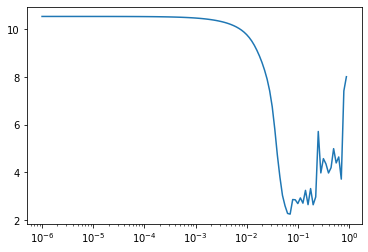

In [9]:
plt.semilogx(fitting.history["lr"], fitting.history["loss"])

In [10]:
optimizer = tf.keras.optimizers.SGD(learning_rate = 1e-1)
model.compile(loss=tf.keras.losses.Huber(), optimizer=optimizer, metrics=["mae"])
fitting = model.fit(features, epochs=300)

Epoch 1/300
5/5 [==============================] - 0s 9ms/step - loss: 4.9723 - mae: 5.4279
Epoch 2/300
5/5 [==============================] - 0s 9ms/step - loss: 4.6968 - mae: 5.1529
Epoch 3/300
5/5 [==============================] - 0s 8ms/step - loss: 4.6470 - mae: 5.0916
Epoch 4/300
5/5 [==============================] - 0s 8ms/step - loss: 4.5522 - mae: 5.0060
Epoch 5/300
5/5 [==============================] - 0s 9ms/step - loss: 4.5669 - mae: 5.0326
Epoch 6/300
5/5 [==============================] - 0s 8ms/step - loss: 4.4806 - mae: 4.9304
Epoch 7/300
5/5 [==============================] - 0s 8ms/step - loss: 4.5670 - mae: 5.0222
Epoch 8/300
5/5 [==============================] - 0s 8ms/step - loss: 4.5362 - mae: 4.9845
Epoch 9/300
5/5 [==============================] - 0s 8ms/step - loss: 4.4509 - mae: 4.9049
Epoch 10/300
5/5 [==============================] - 0s 8ms/step - loss: 4.4106 - mae: 4.8575
Epoch 11/300
5/5 [==============================] - 0s 8ms/step - loss: 4.4018 

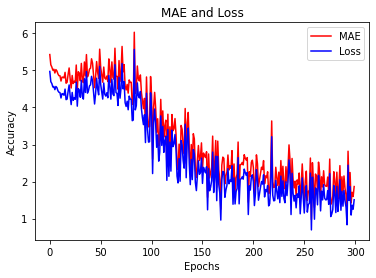

In [11]:
mae = fitting.history['mae']
loss = fitting.history['loss']
epochs=range(len(loss))
plt.plot(epochs, mae, 'r')
plt.plot(epochs, loss, 'b')
plt.title('MAE and Loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["MAE", "Loss"])

In [12]:
def model_forecast(model, TS, n_lag, batch_size):
    ds = tf.data.Dataset.from_tensor_slices(TS)
    ds = ds.window(n_lag, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda row: row.batch(n_lag))
    ds = ds.batch(batch_size)
    forecast = model.predict(ds)
    return forecast

In [13]:
forecast = model_forecast(model, train, n_lag, batch_size)

In [14]:
forecast.shape

(39, 2, 2)

In [15]:
len(series[n_lag:41])

39

In [16]:
forecast = forecast[:, -1, :]

In [17]:
forecast.shape

(39, 2)

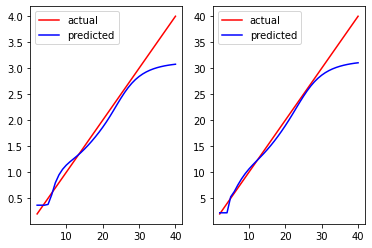

In [18]:
for i in range(2):
  plt.subplot(1,2,i+1)
  plt.plot(range(n_lag, 41), series[n_lag:41,i], 'r')
  plt.plot(range(n_lag, 41), forecast[:,i], 'b')
  plt.legend(["actual", "predicted"])

# Feature scaling

In [41]:
scaler = preprocessing.MinMaxScaler()
scaler.fit(series)
train_scaled = scaler.transform(train)

In [42]:
train_scaled

array([[0.        , 0.        ],
       [0.02040816, 0.02040816],
       [0.04081633, 0.04081633],
       [0.06122449, 0.06122449],
       [0.08163265, 0.08163265],
       [0.10204082, 0.10204082],
       [0.12244898, 0.12244898],
       [0.14285714, 0.14285714],
       [0.16326531, 0.16326531],
       [0.18367347, 0.18367347],
       [0.20408163, 0.20408163],
       [0.2244898 , 0.2244898 ],
       [0.24489796, 0.24489796],
       [0.26530612, 0.26530612],
       [0.28571429, 0.28571429],
       [0.30612245, 0.30612245],
       [0.32653061, 0.32653061],
       [0.34693878, 0.34693878],
       [0.36734694, 0.36734694],
       [0.3877551 , 0.3877551 ],
       [0.40816327, 0.40816327],
       [0.42857143, 0.42857143],
       [0.44897959, 0.44897959],
       [0.46938776, 0.46938776],
       [0.48979592, 0.48979592],
       [0.51020408, 0.51020408],
       [0.53061224, 0.53061224],
       [0.55102041, 0.55102041],
       [0.57142857, 0.57142857],
       [0.59183673, 0.59183673],
       [0.

In [43]:
scaled_features = to_make_features(train_scaled, n_lag, batch_size)

In [26]:
fitting_scaled = model.fit(scaled_features, epochs=120, callbacks=[lr_schedule])

Epoch 1/120
5/5 [==============================] - 0s 9ms/step - loss: 0.6224 - mae: 0.9587
Epoch 2/120
5/5 [==============================] - 0s 8ms/step - loss: 0.6224 - mae: 0.9587
Epoch 3/120
5/5 [==============================] - 0s 10ms/step - loss: 0.6223 - mae: 0.9587
Epoch 4/120
5/5 [==============================] - 0s 8ms/step - loss: 0.6223 - mae: 0.9586
Epoch 5/120
5/5 [==============================] - 0s 8ms/step - loss: 0.6222 - mae: 0.9586
Epoch 6/120
5/5 [==============================] - 0s 8ms/step - loss: 0.6222 - mae: 0.9585
Epoch 7/120
5/5 [==============================] - 0s 8ms/step - loss: 0.6221 - mae: 0.9584
Epoch 8/120
5/5 [==============================] - 0s 8ms/step - loss: 0.6220 - mae: 0.9583
Epoch 9/120
5/5 [==============================] - 0s 7ms/step - loss: 0.6219 - mae: 0.9583
Epoch 10/120
5/5 [==============================] - 0s 7ms/step - loss: 0.6218 - mae: 0.9582
Epoch 11/120
5/5 [==============================] - 0s 8ms/step - loss: 0.6217

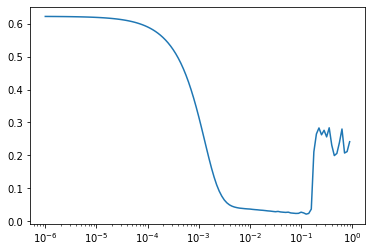

In [29]:
plt.semilogx(fitting_scaled.history["lr"], fitting_scaled.history["loss"])

In [44]:
optimizer = tf.keras.optimizers.SGD(learning_rate = 1e-1)
model.compile(loss=tf.keras.losses.Huber(), optimizer=optimizer, metrics=["mae"])
fitting_scaled = model.fit(scaled_features, epochs=300)

Epoch 1/300
5/5 [==============================] - 0s 9ms/step - loss: 0.0084 - mae: 0.0874
Epoch 2/300
5/5 [==============================] - 0s 8ms/step - loss: 0.0085 - mae: 0.0871
Epoch 3/300
5/5 [==============================] - 0s 8ms/step - loss: 0.0083 - mae: 0.0868
Epoch 4/300
5/5 [==============================] - 0s 8ms/step - loss: 0.0082 - mae: 0.0865
Epoch 5/300
5/5 [==============================] - 0s 8ms/step - loss: 0.0081 - mae: 0.0862
Epoch 6/300
5/5 [==============================] - 0s 9ms/step - loss: 0.0081 - mae: 0.0862
Epoch 7/300
5/5 [==============================] - 0s 8ms/step - loss: 0.0081 - mae: 0.0861
Epoch 8/300
5/5 [==============================] - 0s 8ms/step - loss: 0.0080 - mae: 0.0858
Epoch 9/300
5/5 [==============================] - 0s 8ms/step - loss: 0.0083 - mae: 0.0865
Epoch 10/300
5/5 [==============================] - 0s 8ms/step - loss: 0.0080 - mae: 0.0856
Epoch 11/300
5/5 [==============================] - 0s 7ms/step - loss: 0.0079 

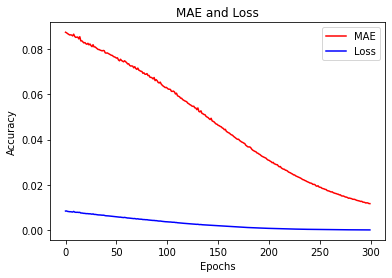

In [45]:
mae = fitting_scaled.history['mae']
loss = fitting_scaled.history['loss']
epochs=range(len(loss))
plt.plot(epochs, mae, 'r')
plt.plot(epochs, loss, 'b')
plt.title('MAE and Loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["MAE", "Loss"])

In [46]:
forecast = model_forecast(model, train_scaled, n_lag, batch_size)
forecast = forecast[:,-1,:]

In [52]:
forecast = scaler.inverse_transform(forecast)

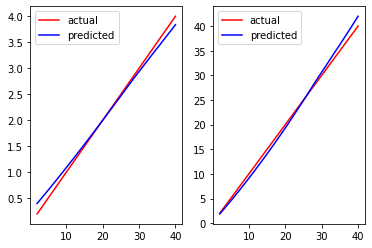

In [54]:
for i in range(2):
  plt.subplot(1,2,i+1)
  plt.plot(range(n_lag, 41), series[n_lag:41,i], 'r')
  plt.plot(range(n_lag, 41), forecast[:,i], 'b')
  plt.legend(["actual", "predicted"])